In [206]:
from manim import *
import numpy as np
from sympy import symbols, cos, sin, pi, lambdify, diff, Matrix
from sympy.vector import CoordSys3D, gradient, curl
import sympy as S

<center> <strong>Basic Wave Equation </strong></center>

$$
\begin{align*}
P(x) &= A\sin{\left(\frac{2\pi}{\lambda} \left( x + \nu t\right) + \phi\right)} \\
\text{where...}\\
P(x) &= \text{Pressure (defined only by an x coordinate)}\\
A &= \text{Amplitude}\\
\lambda &= \text{Wavelength}\\
x &= \text{Position along the x axis}\\
\text{and...}\\
\nu &= f\lambda\\
f &= \text{frequency} = \frac{1}{T}\\
T &= \text{period}\\
t &= \text{time}\\
\end{align*}
$$

In [207]:
t, v, A, lamda, phi, omega, Omega = S.symbols('t, v, A, lamda, phi, omega, Omega' )
v_x, v_y, v_z = S.symbols('v_x, v_y, v_z')

Omega = 2*S.pi/t

a = 5
lamma = 10
phi_value = S.pi/4
seconds_in_day = T=  24*60*60
omega=2*PI/seconds_in_day

v_e = 3
v_i = 10
v_n = 4
v_u = 0

substitutions_list = [(A, a),(Omega, omega),(lamda, lamma), (phi, phi_value), (v_x, v_e), (v_y, v_n), (v_z, v_u), (t,T)]

In [208]:
Omega

2*pi/t

In [209]:
#lets define some pressure field only based on the x axis


#first we define a coordinate system
N = CoordSys3D('N')
N.x

N.x

In [210]:
#interesting... lets try
N.i

N.i

Cool, so 'N.x' gives us the magnitude of the basis vector in the x direction. 'N.i' gives us the base vector 

Let's define a spherical coordinate system 'B' to be compatible with N

In [211]:
Omega = 2*S.pi/t
Omega = Omega*(cos(phi)*N.j + sin(phi)*N.k)
v = v_e*N.i + v_n*N.j + v_u*N.k
v

3*N.i + 4*N.j

In [212]:
Omega

(2*pi*cos(phi)/t)*N.j + (2*pi*sin(phi)/t)*N.k

In [213]:
-Omega.cross(v)

(8*pi*sin(phi)/t)*N.i + (-6*pi*sin(phi)/t)*N.j + (6*pi*cos(phi)/t)*N.k

In [214]:
B = N.create_new('B', transformation='spherical')
B

B

In [215]:
B.i

B.i

In [216]:
N.i.dot(B.i)

1

In [217]:
B.k

B.k

In [218]:
B.z

AttributeError: 'CoordSys3D' object has no attribute 'z'

In [219]:
B.theta, B.phi

(B.theta, B.phi)

In [220]:
rho = Matrix([[0],[2*S.pi/seconds_in_day],[0]])
type(rho)

sympy.matrices.dense.MutableDenseMatrix

lets define a velocity field with this x,y,z coordinate system

In [221]:
turd_velocity_field = N.x*N.i + N.y*N.j
turd_cori_acc = -Omega.cross(turd_velocity_field)
turd_eval = turd_cori_acc.subs(substitutions_list)
turd_matrix = turd_eval.to_matrix(N)
turd_matrix

Matrix([
[ 3.63610260832152e-5*sqrt(2)*N.y],
[-3.63610260832152e-5*sqrt(2)*N.x],
[ 3.63610260832152e-5*sqrt(2)*N.x]])

In [222]:
turd_func= lambdify((N.x, N.y), turd_matrix, 'numpy')

In [223]:
Omega

(2*pi*cos(phi)/t)*N.j + (2*pi*sin(phi)/t)*N.k

In [224]:
def give_manim_goodies(sympy_vector_field, subs_list, coords): #coords should be N or whatever the base coordinate system is
    # manim_string = S.latex(sympy_vector_field)
    manim_string = S.latex(sympy_vector_field).replace('}}', '} }'). replace('{{', '{ {')
    evaluated_vec_field = sympy_vector_field.subs(substitutions_list)
    vec_field_as_matrix = evaluated_vec_field.to_matrix(coords)
    vec_field_as_func = lambdify((N.x, N.y), vec_field_as_matrix, 'numpy')

    return (manim_string, vec_field_as_func)

def coriolis_force(velocity_field, Omega=2*S.pi/t*(cos(phi)*N.j + sin(phi)*N.k)):
    return -2*Omega.cross(velocity_field)
    
    
    

In [225]:
velocity_field = (A*sin(N.x*2*S.pi/lamda)+v_i)*N.i + N.x/lamda*N.j 
velocity_field

(A*sin(2*N.x*pi/lamda) + 10)*N.i + N.x/lamda*N.j

In [226]:
coriolis_force(velocity_field)

(4*N.x*pi*sin(phi)/(lamda*t))*N.i + (-4*pi*(A*sin(2*N.x*pi/lamda) + 10)*sin(phi)/t)*N.j + (-4*pi*(-A*sin(2*N.x*pi/lamda) - 10)*cos(phi)/t)*N.k

In [227]:
coriolis_acceleration = -Omega.cross(velocity_field)
2*coriolis_acceleration

(4*N.x*pi*sin(phi)/(lamda*t))*N.i + (-4*pi*(A*sin(2*N.x*pi/lamda) + 10)*sin(phi)/t)*N.j + (-4*pi*(-A*sin(2*N.x*pi/lamda) - 10)*cos(phi)/t)*N.k

In [228]:
coriolis_acceleration_latex_spaced = S.latex(coriolis_acceleration).replace('}}', '} }'). replace('{{', '{ {')

In [229]:
cori_in_the_house[0]

3.63610260832152e-6*sqrt(2)*N.x

In [230]:
field_1_function = give_manim_goodies(turd_velocity_field, substitutions_list, N)
field_2_function = give_manim_goodies(coriolis_force(turd_velocity_field), substitutions_list, N)


type(field_1_function)
field_1_function[0]

'\\left(\\mathbf{ {x}_{N} }\\right)\\mathbf{\\hat{i}_{N} } + \\left(\\mathbf{ {y}_{N} }\\right)\\mathbf{\\hat{j}_{N} }'

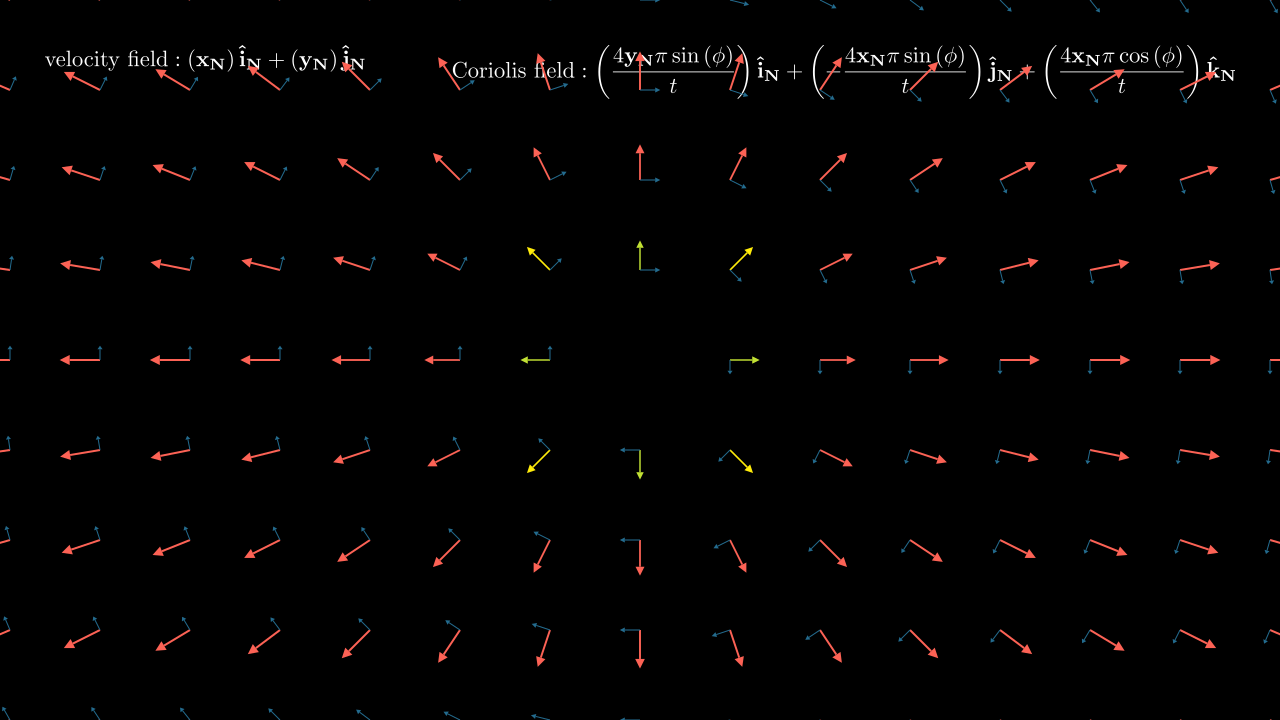

In [231]:
%%manim -qm -v  WARNING Coriolis_field_simple
class Coriolis_field_simple(MovingCameraScene):
    def construct(self):

        domain = np.array([[-15, 15, 0.5],[-15, 15, 0.5],[-10, 10, 1]])
        
        # print(np.min(domain[0]))
        field_1_function = give_manim_goodies(turd_velocity_field, substitutions_list, N)
        field_2_function = give_manim_goodies(coriolis_force(turd_velocity_field), substitutions_list, N)

        equation_1_mobject = MathTex('\\text{velocity field}: ' + field_1_function[0]).scale(.5).to_corner(UL)
        equation_2_mobject = MathTex('\\text{Coriolis field}: '+ field_2_function[0]).scale(.5).to_corner(UR)
        self.add(equation_1_mobject, equation_2_mobject) 
        first_arrow_field_function = lambda pos: field_1_function[1](pos[0], pos[1]).flatten()
        second_arrow_field_function = lambda pos: field_2_function[1](pos[0], pos[1]).flatten()
        # domain = np.array([[-15, 15, 1],[-10, 10, 1],[-40, 40, 0.5]])
        coriolis_vector_field = ArrowVectorField(first_arrow_field_function, 
                                  x_range= [-15,15,1],
                                  y_range= [-15,15,1])
        
        velocity_vector_field = ArrowVectorField(second_arrow_field_function, 
                                  x_range= [-15,15,1],
                                  y_range= [-15,15,1])
        
        self.add(coriolis_vector_field, velocity_vector_field)

In [34]:
# %load_ext line_profiler
%prun Coriolis_field().construct()

         41143868 function calls (35939973 primitive calls) in 75.870 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
3651800/682262    3.356    0.000    3.953    0.000 traversal.py:119(_preorder_traversal)
   109554    3.309    0.000    7.102    0.000 facts.py:599(deduce_all_facts)
5950760/5933462    2.320    0.000    2.402    0.000 {built-in method builtins.isinstance}
686154/641948    1.881    0.000   12.144    0.000 cache.py:69(wrapper)
71114/59582    1.874    0.000    7.428    0.000 basisdependent.py:238(__new__)
   361336    1.662    0.000    3.410    0.000 sympify.py:101(sympify)
    59551    1.578    0.000    1.578    0.000 bezier.py:54(<lambda>)
  2139186    1.450    0.000    1.818    0.000 facts.py:633(<genexpr>)
124930/21142    1.227    0.000   21.762    0.001 printer.py:294(_print)
  2330430    1.158    0.000    1.366    0.000 {built-in method builtins.hasattr}
   126852    1.083    0.000    2.265    0.000 repma